# Adjacency matrices and Graph nodes re-ordering
- Graph nodes can be re-ordered in <b>N! different ways</b> : a simple 10 nodes graph has more than 3 millions possible arrangements ;
- Each node arrangement can be measured in terms of efficiency : is the order reflecting the Graph relations ?
- Whereas many algorithms have been developed to optimize these arrangements and find the most efficient diffusions, some other algorithms will focus on node clustering ; adjacency matrices can indeed be used in multiple ways. 

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import networkx as nx
random.seed(48)

N = 15                 # Length of the square's side
M = np.arange(N**2)    # cells ids, range length ^ 2
np.random.shuffle(M)   # shuffled
M = M.reshape(N,-1)    # reshaped as a square
print (M)

[[126  62   3 178  70  33  60 152  77 188  89 135 219  17  50]
 [ 23 160  76 159  91 201 186  99 115 189 203 210 113 206  80]
 [124 217  97 205 111 172 197 224  95 102 211  34  73 194  19]
 [ 96 166 182  85  84  28 101  71 148 195  25  74 207 174  15]
 [169 176  13  14 138 208 154 185 173 140 200 193  43 180 117]
 [105  21  75 163  40 179 127 175  61 191 204 112  18  92  47]
 [ 58 202 196 184 192  49 147  52 153 129  81 151 120 162 216]
 [ 82  66 190  48  53 177 121 144  24  67 146  69  16  36   8]
 [  7  94 156  10  54 134  37  29 125  12 137 123 218 143 212]
 [132  11  87 141  51  46 116  79 170  86 198   0  88  63  42]
 [164 171  64 181 187  22  45  93 209 155 199 106 118 119 149]
 [ 31 100 158 133 215 130 108  72 110 157 142  98  83 223 161]
 [ 90  32 222  27 168  35  56 128  68 136  59 220   2  20   5]
 [  1  65  30 145 139  26 183 107  57  38  55 214  39  44   4]
 [131 114 167 122 109 165 103   6  78 104   9 150 213  41 221]]


In [2]:
class Collection:
    
    def __init__(self, name="undefined", groups=[]):
        self.name = name
        self.groups = groups
        self.edges = False
        self.nodes = False
        self.graphs = {}
        
        self.getEdges()
        self.verbose = 1
        
    def getEdges(self):
        edges, nodes = [], []
        for group in self.groups:
            [edges.append((a,b)) for b in group for a in group if a!=b]
            [nodes.extend([a,b]) for b in group for a in group if a!=b]
        edges_ordered = []
        [edges_ordered.append([min(e), max(e)]) for e in edges if [min(e), max(e)] not in edges_ordered]
        
        self.nodes = list(set(nodes))
        self.edges = edges_ordered
    
    def __repr__(self):
        s = ""
        s += f"Name    : {self.name}\n"
        s += f"Groups  : {len(self.groups)}\n"
        s += f"Edges   : {len(self.edges)}\n"
        s += f"Nodes   : {len(self.nodes)}\n"
        return s

In [3]:
#################### Génération de clusters de pixels contigus ou proches, kernel 3x3
#################### Ici chaque cluster compte 9 objets, de manière parfaitement régulière
#################### ça correspond à une matrice de voisinage partielle

groups = [M[i:i+3,ii:ii+3].ravel().tolist() 
            for i in range(M.shape[0]-2) 
            for ii in range(M.shape[1]-2)]

random.shuffle(groups)

COL1 = Collection("Homogenous data", groups)
print (COL1)

print ('Cluster sample :', COL1.groups[0])

Name    : Homogenous data
Groups  : 169
Edges   : 2268
Nodes   : 225

Cluster sample : [220, 2, 20, 214, 39, 44, 150, 213, 41]


## Graph node order matters

In [4]:
#################### Fonction pratique affichant la matrice d'adjacence en tenant
#################### compte de l'ordre des noeuds, si spécifié, sinon c'est l'odre
#################### du graphe qui est appliqué.

def draw_adjacency_matrix(G, shape=False, node_order=None, partitions=[], colors=[], title=""):
    
    if isinstance(G, np.ndarray):
        adjacency_matrix = G
    else:
        adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)
        
    fig = plt.figure(figsize=(4,4)) 
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")    
    ax = plt.gca()
    
    if shape != False:
        if isinstance(G, np.ndarray):
            length = G.shape[0]
        else:
            length = len(G.nodes)
        for i in range(1, shape[0]):
            plt.axvline(i*(length/shape[0])-0.5, color='r', linewidth="0.4")
        for i in range(1, shape[1]):
            plt.axhline(i*(length/shape[1])-0.5, color='r', linewidth="0.4")

    plt.title(title, fontsize=10)  
    plt.show()
    plt.close()

In [7]:
class Graph:
    def __init__(self, key="undefined", dataset=False, node_list=None):
        self.name = key
        self.source_name = dataset.name
        self.node_list = node_list
        self.edges = dataset.edges  
        self.degrees = False
        self.G = False
        self.A = False
        
        self.makeGraph()
        self.makeAdjacency()
        
        if self.node_list is None:
            self.node_list = [n for n in self.G.nodes]
        
        self.makeDegrees()
    
    def makeGraph(self):
        self.G = nx.Graph()
        if self.node_list is not None: 
            self.G.add_nodes_from(self.node_list)
        self.G.add_edges_from(self.edges)
    
    def makeAdjacency(self):
        self.A = nx.adjacency_matrix(self.G).todense()
        
    def makeDegrees(self):
        self.degrees = [self.G.degree(n) for n in self.G.nodes]
    
    def __repr__(self):
        s = ""
        s += f"Graph name   : {self.name}\n"
        s += f"Nodes        : {len(self.G.nodes)}\n"
        s += f"Edges        : {len(self.G.edges)}\n"

Collection.Graph = Graph

def makeGraph(self, key="undefined", node_list=[]):
    Gr = Graph(key=key, dataset=self, node_list=node_list)
    self.graphs[key] = Gr

Collection.makeGraph = makeGraph

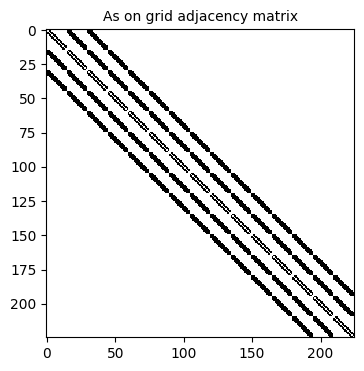

In [8]:
COL = COL1
name = "As on grid"
node_order = M.ravel().tolist()  # ordre de la grille d'origine (ordre idéal du point de vue des adjacences)

COL.makeGraph(name, node_order)

draw_adjacency_matrix(COL.graphs[name].A, title=f'{name} adjacency matrix')

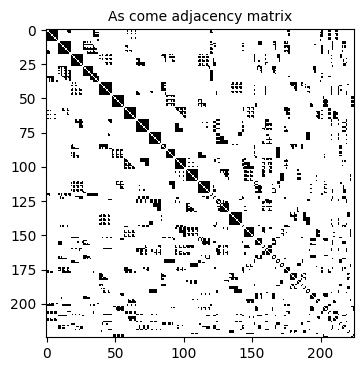

In [9]:
COL = COL1
name = "As come"
node_list = None
COL.makeGraph(name, node_list)

draw_adjacency_matrix(COL.graphs[name].A, title=f'{name} adjacency matrix')

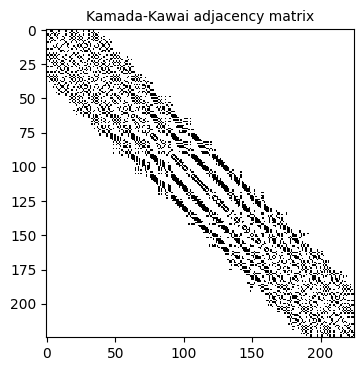

In [10]:
COL = COL1
name = "Kamada-Kawai"

kamada = nx.kamada_kawai_layout(COL.graphs['As come'].G, dim=1)
pos = [(k,v[0]) for k,v in kamada.items()]
pos_sorted = sorted(pos, key=lambda x : x[1])
node_order = [a[0] for a in pos_sorted]

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

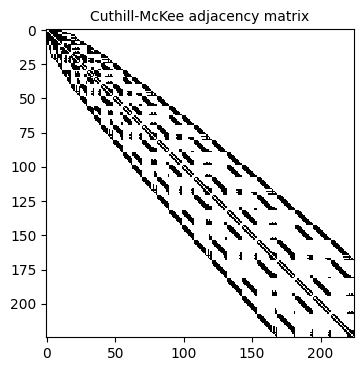

In [12]:
from networkx.utils import cuthill_mckee_ordering

def smallest_degree(G):
    return min(G, key=G.degree)

COL = COL1
rcm = list(cuthill_mckee_ordering(COL.graphs['As come'].G, heuristic=smallest_degree))

name = "Cuthill-McKee"
node_order = rcm

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

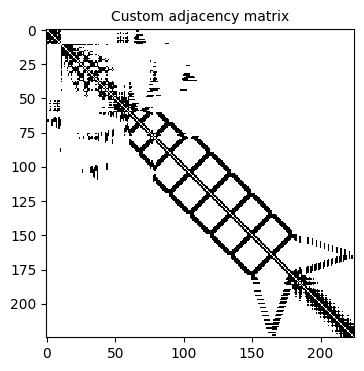

In [13]:
COL = COL1
name = "Custom"

from functions import order_custom

node_order = order_custom.test_01(COL.graphs['As come'], substract=2)
COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

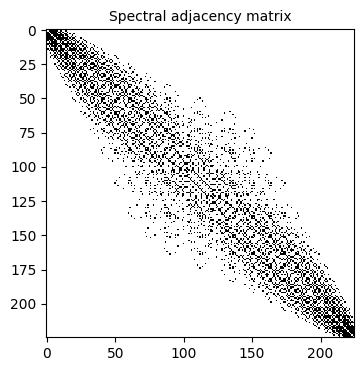

In [14]:
COL = COL1
name = "Spectral"

spectral = nx.spectral_layout(COL.graphs['As come'].G, dim=1)
pos = [(k,v[0]) for k,v in spectral.items()]
pos_sorted = sorted(pos, key=lambda x : x[1])
node_order = [a[0] for a in pos_sorted]

COL.makeGraph(name, node_order)

draw_adjacency_matrix(COL.graphs[name].A, title=f'{name} adjacency matrix')

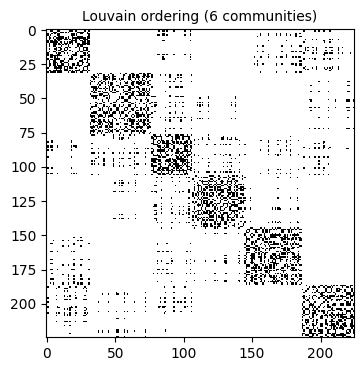

In [15]:
COL = COL1
name = "Louvain"

louvain = nx.community.louvain_communities(COL1.graphs['As come'].G, 
                                           resolution=1, seed=123)
louvain_n = []
[louvain_n.append(v) for l in louvain for v in l]
node_order = louvain_n

COL1.makeGraph(name, node_order)

draw_adjacency_matrix(COL1.graphs[name].A, title=f"{name} ordering ({len(louvain)} communities)")

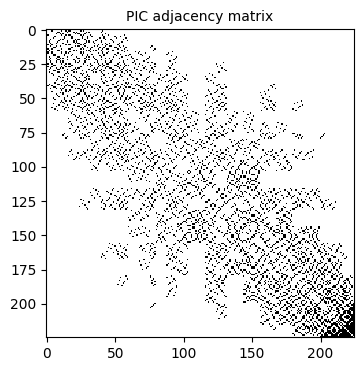

In [17]:
from functions import order_pic

COL = COL1
name = "PIC"

v = order_pic.pic(COL.graphs['As come'].A, 10000, 1.0e-2)
P = np.argsort(v.ravel())
node_order = list(np.array([n for n in COL.graphs['As come'].G.nodes])[P][0])

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

## Comparison

In [19]:
def getDistance(self):
    # sum of the differences of each point to the main diagonal
    sums = np.array([np.sum(np.abs(self.A[i].nonzero()[0]-i))/2
                     for i in range(self.A.shape[0])]).astype(int)
    amnt = np.array([np.sum(self.A[i]!=0) for i in range(self.A.shape[0])])
    avg = np.mean( sums / (amnt+0.000001) )
    return np.sum(sums), avg

Graph.getDistance = getDistance

def evaluate(self):
    s = 42*'~' + "\n"
    s += f"Node order evaluation\n"
    s += f"{self.name}\n"
    s += 42*'~' + "\n"
    s += f"{ '{:<22}'.format('') }     {'{:>6}'.format('sum(D)')} {'{:>8}'.format('Average')}\n"
    for k in self.graphs:
        dist, d_mean = self.graphs[k].getDistance()
        s += f"{ '{:<22}'.format(k) } :   {'{:>6}'.format(dist)} {'{:>8.2f}'.format(d_mean)}\n"
    s += 42*'~' + "\n"
    print (s)

Collection.compareDistances = evaluate

In [20]:
COL1.compareDistances()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Node order evaluation
Homogenous data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                           sum(D)  Average
As on grid             :    41978     9.18
As come                :   129273    28.43
Kamada-Kawai           :    42173     9.28
Cuthill-McKee          :    50301    11.11
Custom                 :    39736     8.44
Spectral               :    37735     7.91
Louvain                :    80383    16.96
PIC                    :    74003    15.98
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



## Removing some information

In [23]:
import copy
random.seed(8)

# Now every second group is altered randomly
groups_alter = copy.deepcopy(groups)
[group.pop(random.randint(0,len(group)-1)) for group in groups_alter]

COL2 = Collection("Some edges removed", groups_alter)
print (COL1)
print (COL2)

Name    : Homogenous data
Groups  : 169
Edges   : 2268
Nodes   : 225

Name    : Some edges removed
Groups  : 169
Edges   : 2120
Nodes   : 225



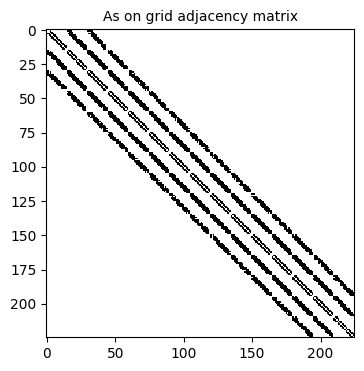

In [24]:
name = "As on grid"
node_order = M.ravel().tolist()

COL2.makeGraph(name, node_order)

draw_adjacency_matrix(COL2.graphs[name].A, title=f'{name} adjacency matrix')

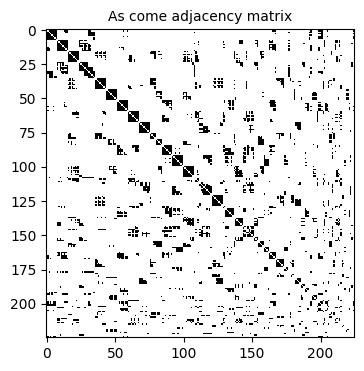

In [25]:
COL = COL2
name = "As come"
node_order = None

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

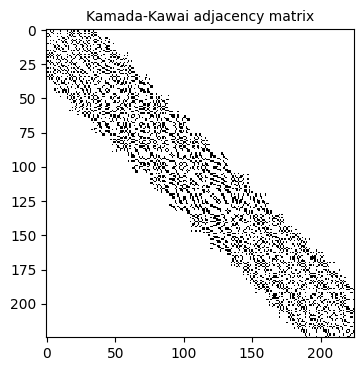

In [26]:
COL = COL2
name = "Kamada-Kawai"

kamada = nx.kamada_kawai_layout(COL.graphs['As come'].G, dim=1)
pos = [(k,v[0]) for k,v in kamada.items()]
pos_sorted = sorted(pos, key=lambda x : x[1])
node_order = [a[0] for a in pos_sorted]

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

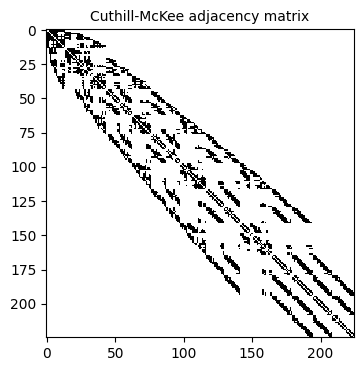

In [27]:
from networkx.utils import cuthill_mckee_ordering

def smallest_degree(G):
    return min(G, key=G.degree)

COL = COL2
rcm = list(cuthill_mckee_ordering(COL.graphs['As come'].G, heuristic=smallest_degree))

name = "Cuthill-McKee"
node_order = rcm

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

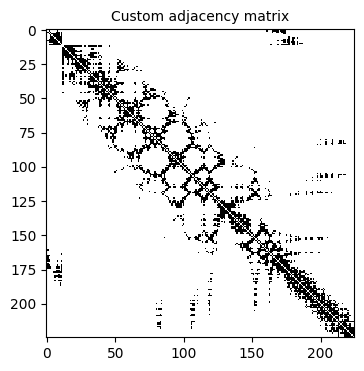

In [29]:
COL = COL2
name = "Custom"

node_order = order_custom.test_01(COL.graphs['As come'], substract=2)

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

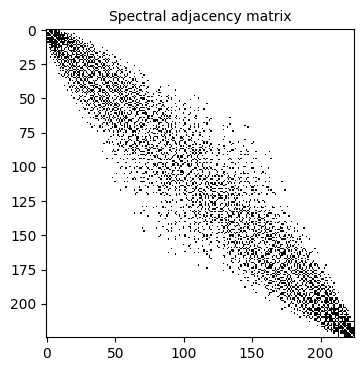

In [30]:
COL = COL2
name = "Spectral"

spectral = nx.spectral_layout(COL.graphs['As come'].G, dim=1)
pos = [(k,v[0]) for k,v in spectral.items()]
pos_sorted = sorted(pos, key=lambda x : x[1])
node_order = [a[0] for a in pos_sorted]

COL.makeGraph(name, node_order)

draw_adjacency_matrix(COL.graphs[name].A, title=f'{name} adjacency matrix')

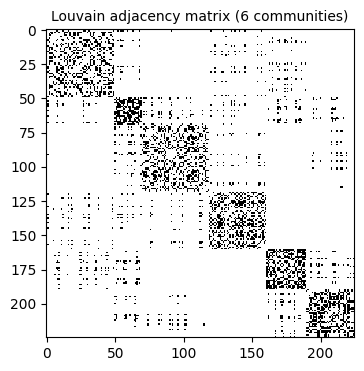

In [31]:
louvain = nx.community.louvain_communities(COL2.graphs['As come'].G, 
                                           resolution=1, seed=123)
louvain_n = []
[louvain_n.append(v) for l in louvain for v in l]

name = "Louvain"
node_order = louvain_n
COL2.makeGraph(name, node_order)

draw_adjacency_matrix(COL2.graphs[name].A, title=f'{name} adjacency matrix ({len(louvain)} communities)')

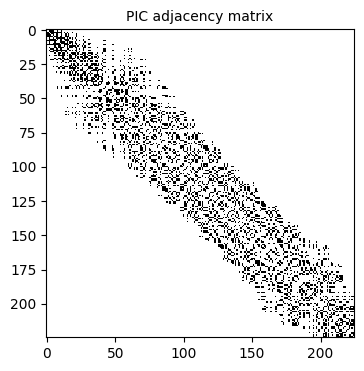

In [33]:
COL = COL2
name = "PIC"

v = order_pic.pic(COL.graphs['As come'].A, 50000, 1.0e-2)
P = np.argsort(v.ravel())
node_order = list(np.array([n for n in COL.graphs['As come'].G.nodes])[P][0])

COL.makeGraph(name, node_order)
draw_adjacency_matrix(COL.graphs[name].A, title=f"{name} adjacency matrix")

In [34]:
COL2.compareDistances()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Node order evaluation
Some edges removed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                           sum(D)  Average
As on grid             :    38144     8.89
As come                :   125464    29.75
Kamada-Kawai           :    38635     9.08
Cuthill-McKee          :    42562     9.76
Custom                 :    43820    10.26
Spectral               :    33917     7.54
Louvain                :    68151    15.35
PIC                    :    36214     8.16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



## Adding some noise

In [36]:
import copy
random.seed(7)

# Alteration : (1) every is altered randomly
#              (2) one random node is added in each group

groups_noise = copy.deepcopy(groups)
[group.pop(random.randint(0,len(group)-1)) for group in groups_noise]
[group.append(random.randint(0,M.ravel().shape[0]-1)) for group in groups_noise]

COL3 = Collection("Some edges removed, noise", groups_noise)
print (COL1)
print (COL3)

Name    : Homogenous data
Groups  : 169
Edges   : 2268
Nodes   : 225

Name    : Some edges removed, noise
Groups  : 169
Edges   : 3295
Nodes   : 225



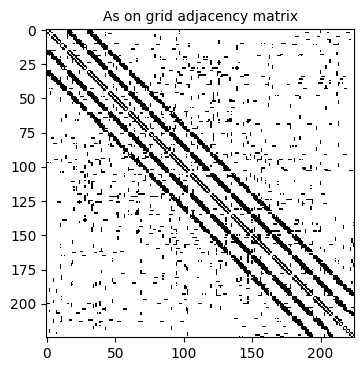

In [37]:
DS = COL3
name = "As on grid"
node_order = M.ravel().tolist()

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix")

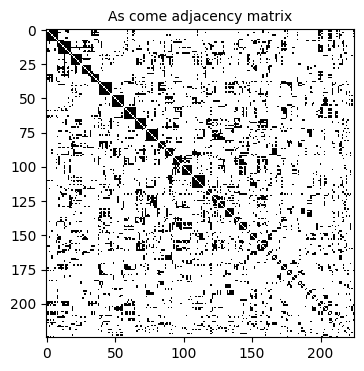

In [38]:
DS = COL3
name = "As come"
node_order = None

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix")

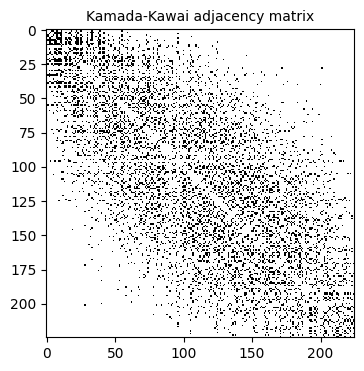

In [39]:
DS = COL3
name = "Kamada-Kawai"

kamada = nx.kamada_kawai_layout(COL3.graphs['As come'].G, dim=1)
pos = [(k,v[0]) for k,v in kamada.items()]
pos_sorted = sorted(pos, key=lambda x : x[1])
node_order = [a[0] for a in pos_sorted]

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix")

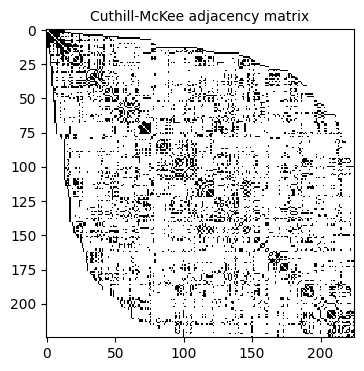

In [40]:
DS = COL3
name = "Cuthill-McKee"
rcm = list(cuthill_mckee_ordering(DS.graphs['As come'].G, heuristic=smallest_degree))
node_order = rcm

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix")

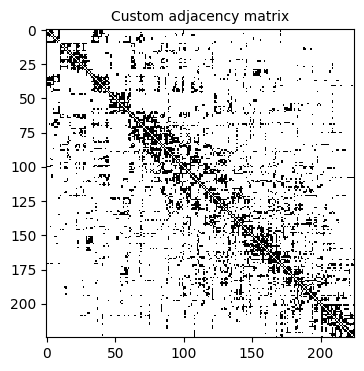

In [42]:
DS = COL3
name = "Custom"

node_order = order_custom.test_01(DS.graphs['As come'], substract=2)

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix")

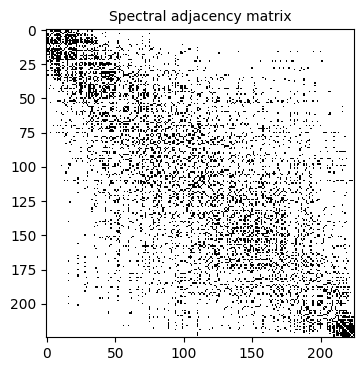

In [43]:
DS = COL3
name = "Spectral"

spectral = nx.spectral_layout(DS.graphs['As come'].G, dim=1)
pos = [(k,v[0]) for k,v in spectral.items()]
pos_sorted = sorted(pos, key=lambda x : x[1])
node_order = [a[0] for a in pos_sorted]

DS.makeGraph(name, node_order)

draw_adjacency_matrix(DS.graphs[name].A, title=f'{name} adjacency matrix')

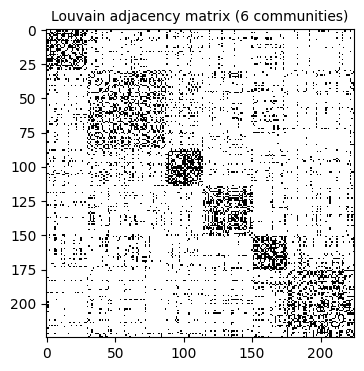

In [44]:
DS = COL3
name = "Louvain"

louvain = nx.community.louvain_communities(DS.graphs['As come'].G, 
                                           resolution=1., seed=123)
louvain_n = []
[louvain_n.append(v) for l in louvain for v in l]
node_order = louvain_n

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix ({len(louvain)} communities)")

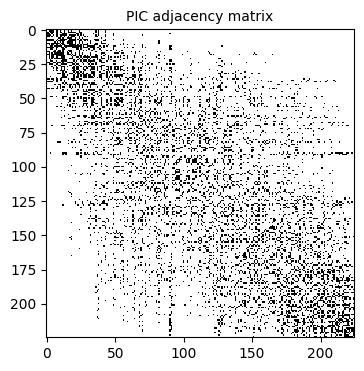

In [45]:
DS = COL3
name = "PIC"

v = order_pic.pic(DS.graphs['As come'].A, 50000, 1.0e-2)
P = np.argsort(v.ravel())
node_order = list(np.array([n for n in DS.graphs['As come'].G.nodes])[P])[0]

DS.makeGraph(name, node_order)
draw_adjacency_matrix(DS.graphs[name].A, title=f"{name} adjacency matrix")

In [46]:
COL3.compareDistances()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Node order evaluation
Some edges removed, noise
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                           sum(D)  Average
As on grid             :   122564    18.25
As come                :   207820    31.80
Kamada-Kawai           :   128605    19.60
Cuthill-McKee          :   169850    25.35
Custom                 :   118458    17.94
Spectral               :   122219    17.91
Louvain                :   146179    20.85
PIC                    :   131165    18.96
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# Is that good news?
- With regard to optimal adjacencies, the <b>Power Iterations Clustering</b> algorithm and the <b>Spectral</b> algorithm show the best results - they outperform the original modular order ;
- Nodes re-ordering is critical for distance optimization ; several algorithm families can help in that direction, be them <b>ordering</b> algos, <b>clustering</b> algos or <b>graph layout</b> algos. They all help to choose among the overwhelming combination possibilities that such matrices quickly provide ;
- None of the above algorithms focuses on "modular ordering", they all aim to minimize the distances between adjacent nodes ; so far, the <b>Cuthill-McKee</b> algorithm provides an expanding modular re-ordering and the <b>Kamada-Kawai Graph layout</b> gets close to the original.

# Next steps
- With regard to the above studycase, it would be worth focusing not on optimal adjacencies and getting as close to the diagonal as possible, but on <b>constant distances to the diagonal</b> ; Not the "optimal distance" but the "constant distances" ;
- I suspect such an algorithm to being helpful for Graph layout representations and for architectural purposes.